## Implementing Linear Regression on Fish Dataset

In [127]:
# %matplotlib notebook
# %matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


plt.style.use('ggplot')

Load dataset as a dataframe and choose `Length1` and `Length3` columns as features. 

In [301]:
data = pd.read_csv('../datasets/Fish.csv')
# data = data[data['Species'].isin(['Bream', 'Roach'])]
data = data[['Length1','Length3']]
data = data.where(data.Length3 < 50)
data.Length1 = (data.Length1 - data.Length1.mean()) / data.Length1.std()
data.Length3 = (data.Length3 - data.Length3.mean()) / data.Length3.std()


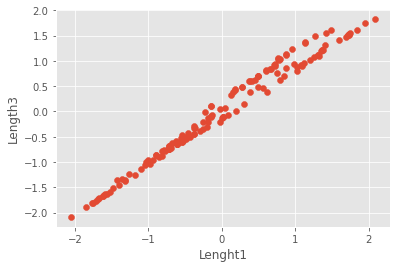

In [302]:
plt.scatter(data.Length1, data.Length3)
plt.xlabel('Lenght1')
plt.ylabel('Length3')
plt.show()

In [320]:
class regression :
    def __init__(self, alpha):
        self.alpha = alpha
        self.theta_initializer()

    def hypothesis(self, x):
        return (self.theta0 + self.theta1 * x)
    
    def theta_initializer(self):
        self.theta0, self.theta1 = np.random.randn(2)
    
    def cost_function(self, x, y, th1):
        '''the implemented cost funtion is sum of squared errors devided by 2'''
        h_t = th1 * x
        cost = ((h_t - y)**2).sum() * 1/2
        return cost


    def fit(self, x, y):
        delta_theta0 =  -1 * self.alpha * (self.hypothesis(x) - y).sum()
        delta_theta1 =  -1 * self.alpha * ((self.hypothesis(x) - y)*x).sum()
        self.theta0 = self.theta0 + delta_theta0
        self.theta1 = self.theta1 + delta_theta1

        

test = np.arange(start=-5, stop=5, step=0.2)
results = []
losses = []

regressor = regression(0.001)

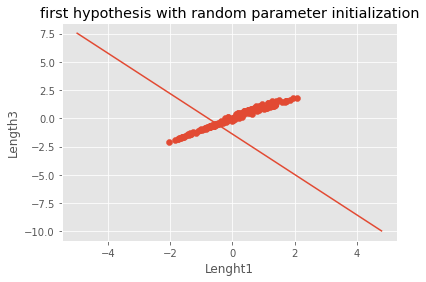

values of theta0 and theta1 :
-1.4011272641253227 -1.785348603208746


In [321]:
plt.scatter(data.Length1, data.Length3)
plt.xlabel('Lenght1')
plt.ylabel('Length3')
plt.plot(test, regressor.hypothesis(test))


# regressor.fit(data.Length1, data.Length3)

plt.title('first hypothesis with random parameter initialization')
plt.show()
print('values of theta0 and theta1 :')
print(regressor.theta0, regressor.theta1)


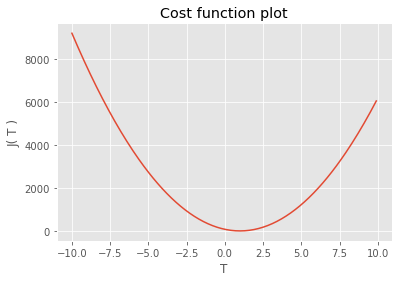

In [322]:
losses = []
Xs =  np.arange(start=-10, stop=10, step=0.1)
for i in Xs:
    losses.append(regressor.cost_function(data.Length1, data.Length3, i))
plt.title("Cost function plot")
plt.xlabel("T")
plt.ylabel("J( T )")
plt.plot(Xs, losses)
plt.show()

In [323]:
fig, ax = plt.subplots()

# regressor = regression(0.001)

def animate(i):
    ax.cla()
    ax.scatter(data.Length1, data.Length3)
    ax.plot(test, regressor.hypothesis(test))
    # ax.set_xlim(0,100)
    # ax.set_ylim(-30, 60)
    ax.set_xlabel('Lenght1')
    ax.set_ylabel('Length3')
    regressor.fit(data.Length1, data.Length3)
    # print(regressor.theta0, regressor.theta1)
    

ani = FuncAnimation(fig, animate, interval=300, frames=30)

# plt.tight_layout()


# time.sleep(10)
plt.close()


In [324]:
HTML(ani.to_html5_video())

[[0.         0.98976621]]


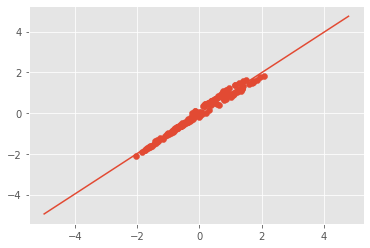

In [325]:
from sklearn import linear_model 

# data = pd.read_csv('../datasets/Fish.csv')
# data = data[data['Species'].isin(['Bream', 'Roach'])]
# data = data[['Length1','Length3']]
# data = data.where(data.Length3 < 50)



reg = linear_model.LinearRegression()
data = data.dropna()
ones = np.ones(len(data.Length1))

np.array([ones, data.Length1]).reshape

reg.fit([[i, j] for i, j in zip(ones, data.Length1)], np.array(data.Length3).reshape(-1, 1))

def hyp(x, theta0, theta1) :
    return (theta0 + theta1 * x)

test = np.arange(start=-5, stop=5, step=0.2)
test_ones = np.ones(len(test))

plt.scatter(data.Length1, data.Length3)
plt.plot(test, reg.predict([[i, j] for i, j in zip(ones, test)]))


print(reg.coef_)
# plt.plot(theta0 = reg.coef_[0], theta1 = reg.coef_[1], x = test)

In [327]:

def cost(theta0, theta1, x, y):
    return (((theta0 + theta1 * x) - y )**2).sum() * 1/2

print("my parameters values :")
print(regressor.theta0, regressor.theta1)
print("scikit learn parameters values :")
print(reg.coef_[0][0], reg.coef_[0][1])
print( 'scikit learn\' loss :', cost(reg.coef_[0][0], reg.coef_[0][1], data.Length1, data.Length3) )
print( 'mine\' loss :', cost(regressor.theta0, regressor.theta1, data.Length1, data.Length3) )


my parameters values :
-0.008144478932046145 0.973034035913252
scikit learn parameters values :
0.0 0.9897662100439578
scikit learn' loss : 1.5475765585967718
mine' loss : 1.5739283871696315
